In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense


In [2]:
df = pd.read_csv('D:/Programing_works/6th_semester_work/Python/lab_8_21_mar/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
get_ipython().run_line_magic('matplotlib','inline')

In [7]:
import matplotlib.pyplot as plt
# df.hist(bins=50, figsize=(20, 15))

In [8]:
train_df = df.sample(frac=0.75, random_state=4)
# 75% of data is selected

val_df = df.drop(train_df.index)

In [9]:
# calling the (0,1) range scalling
max_val = train_df.max(axis = 0)
min_val = train_df.min(axis = 0)
range = max_val - min_val
train_df = (train_df - min_val)/(range)
val_df = (val_df - min_val)/range

X_train = train_df.drop('quality', axis=1)
X_val = val_df.drop('quality', axis=1)
y_train = train_df['quality']
y_val = val_df['quality']
input_shape = [X_train.shape[1]]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mae')
losses = model.fit(X_train, y_train, 
                   validation_data=(X_val, y_val), 
                   batch_size = 100, 
                   epochs=15
                   )


Epoch 1/15
12/12 [==============================] - 1s 28ms/step - loss: 0.5018 - val_loss: 0.2992
Epoch 2/15
12/12 [==============================] - 0s 9ms/step - loss: 0.1873 - val_loss: 0.1565
Epoch 3/15
12/12 [==============================] - 0s 8ms/step - loss: 0.1542 - val_loss: 0.1351
Epoch 4/15
12/12 [==============================] - 0s 8ms/step - loss: 0.1327 - val_loss: 0.1288
Epoch 5/15
12/12 [==============================] - 0s 7ms/step - loss: 0.1229 - val_loss: 0.1184
Epoch 6/15
12/12 [==============================] - 0s 7ms/step - loss: 0.1134 - val_loss: 0.1108
Epoch 7/15
12/12 [==============================] - 0s 6ms/step - loss: 0.1082 - val_loss: 0.1068
Epoch 8/15
12/12 [==============================] - 0s 6ms/step - loss: 0.1055 - val_loss: 0.1059
Epoch 9/15
12/12 [==============================] - 0s 6ms/step - loss: 0.1033 - val_loss: 0.1040
Epoch 10/15
12/12 [==============================] - 0s 6ms/step - loss: 0.1015 - val_loss: 0.1036
Epoch 11/15
12/12 

In [11]:
X_val.iloc[121:124, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
540,0.407080,0.321918,0.303797,0.165517,0.148581,0.267606,0.144876,0.640969,0.347826,0.206061,0.184615
543,0.584071,0.369863,0.303797,0.110345,0.121870,0.211268,0.166078,0.677680,0.173913,0.236364,0.400000
548,0.690265,0.157534,0.620253,0.117241,0.111853,0.366197,0.222615,0.685022,0.226087,0.254545,0.307692


In [12]:
model.predict(X_val.iloc[121:124,:])

1/1 [==============================] - 0s 78ms/step


array([[0.47609848],
       [0.6358344 ],
       [0.5923348 ]], dtype=float32)

In [13]:
y_val.iloc[121:124]

540    0.4
543    0.6
548    0.6
Name: quality, dtype: float64

<AxesSubplot:>

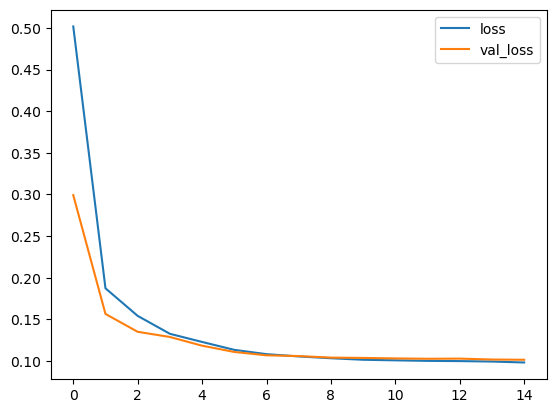

In [14]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss', 'val_loss']].plot()

In [15]:
type(losses.history)

dict

In [16]:
losses.history

{'loss': [0.5017939805984497,
  0.18728330731391907,
  0.15416376292705536,
  0.13265115022659302,
  0.12286767363548279,
  0.11336079984903336,
  0.10819631814956665,
  0.10545681416988373,
  0.10329380631446838,
  0.10147099196910858,
  0.10077334940433502,
  0.10012739151716232,
  0.0998699814081192,
  0.09932637959718704,
  0.09820472449064255],
 'val_loss': [0.29920655488967896,
  0.15649722516536713,
  0.13505010306835175,
  0.12882038950920105,
  0.11835659295320511,
  0.11083579063415527,
  0.10680621862411499,
  0.10591281950473785,
  0.10404816269874573,
  0.1036490648984909,
  0.10307829082012177,
  0.10266177356243134,
  0.1028285026550293,
  0.10175072401762009,
  0.10145094245672226]}

In [17]:
loss_df

,loss,val_loss
0,0.501794,0.299207
1,0.187283,0.156497
2,0.154164,0.135050
3,0.132651,0.128820
4,0.122868,0.118357
5,0.113361,0.110836
6,0.108196,0.106806
7,0.105457,0.105913
8,0.103294,0.104048
9,0.101471,0.103649
